In [1]:
import os
os.getenv('CONDA_PREFIX')

'C:\\Users\\Abhijeet\\Anaconda3n'

In [2]:
os.environ["CONDA_PREFIX"] = "asdasd"

In [3]:
import sys
sys.prefix

'C:\\Users\\Abhijeet\\Documents\\GitHub\\Datathon\\dt'

In [4]:
sys.platform 

'win32'

In [6]:
import numpy as np
import pandas as pd
from plotnine import *
import random
import os
os.getenv('CONDA_PREFIX')
import pathlib
import datetime

In [7]:
mt = ( 
    theme(figure_size=(15,5) 
          , panel_background=element_rect(fill="white") 
          , panel_grid_major=element_line(alpha=0.1 , color="#1d3557"))
)

In [25]:
dfs = [pd.read_csv(pathlib.Path("." , "output" , f)) for f in os.listdir("output") if f.find(".log") > -1]

In [26]:
df = pd.concat(dfs)

In [27]:
df = df.iloc[: , 1:]
df["time"] = pd.to_datetime(df["time"])

In [28]:
df

,mac,time,building
0,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:15:00,Storrs
1,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:30:00,Storrs
2,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:45:00,Storrs
3,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 10:00:00,Storrs
4,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 11:00:00,Storrs
...,...,...,...
21332,fe:f0:e3:b7:f0:b6,2020-12-06 15:15:00,NRFC Fieldhouse
21333,fe:f0:e3:b7:f0:b6,2020-12-06 15:30:00,NRFC Fieldhouse
21334,fe:f0:e3:b7:f0:b6,2020-12-06 15:45:00,NRFC Fieldhouse
21335,fe:f0:e3:b7:f0:b6,2020-12-06 16:00:00,NRFC Fieldhouse


In [29]:
mac_to_person_const = ((1900 + 2*250 + 3*50)/(1900 + 250 + 50))
mac_to_person_const = 1/mac_to_person_const
mac_to_person_const

0.8627450980392156

In [30]:
def time_cols(df):
    df["date"] = df["time"].dt.month.astype(str) +"-" + df["time"].dt.day.astype(str)
    df["day"] = df["time"].dt.dayofweek
    df["week"] = df["time"].dt.week.astype("category")
    df["time_of_day"] = df["time"].apply(lambda d : datetime.datetime.time(d)).astype("category")
    return df

In [31]:
df = time_cols(df)

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [32]:
df

,mac,time,building,date,day,week,time_of_day
0,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:15:00,Storrs,9-14,0,38,09:15:00
1,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:30:00,Storrs,9-14,0,38,09:30:00
2,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:45:00,Storrs,9-14,0,38,09:45:00
3,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 10:00:00,Storrs,9-14,0,38,10:00:00
4,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 11:00:00,Storrs,9-14,0,38,11:00:00
...,...,...,...,...,...,...,...
21332,fe:f0:e3:b7:f0:b6,2020-12-06 15:15:00,NRFC Fieldhouse,12-6,6,49,15:15:00
21333,fe:f0:e3:b7:f0:b6,2020-12-06 15:30:00,NRFC Fieldhouse,12-6,6,49,15:30:00
21334,fe:f0:e3:b7:f0:b6,2020-12-06 15:45:00,NRFC Fieldhouse,12-6,6,49,15:45:00
21335,fe:f0:e3:b7:f0:b6,2020-12-06 16:00:00,NRFC Fieldhouse,12-6,6,49,16:00:00


In [33]:
df["building"].nunique()

86

In [34]:
def get_daily_counts(df , additional_grouper=[]):
    return (
            df.groupby([pd.Grouper(key="time" , freq="1d")] + additional_grouper)
             .apply(lambda df : df["mac"].nunique()*mac_to_person_const)
             .reset_index()
             .rename({0 : "count"} , axis=1)
    )

In [35]:
dailycounts = get_daily_counts(df)

In [36]:
dailycounts["macbased"] = True

In [37]:
access_count = pd.read_excel("access_count_data_9-14to9-28.xlsx")

In [38]:
access_count = access_count.groupby("EventDateTime")["access_count"].sum().reset_index()
access_count["macbased"] = False
access_count.columns = dailycounts.columns
dailycounts = dailycounts.append(access_count)

In [39]:
import datetime
dailycounts["time"].max() +  datetime.timedelta(days=5)

Timestamp('2020-12-11 00:00:00')

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\scales\scale.py:103: PlotnineWarning: scale_x_datetime could not recognise parameter `date_break`


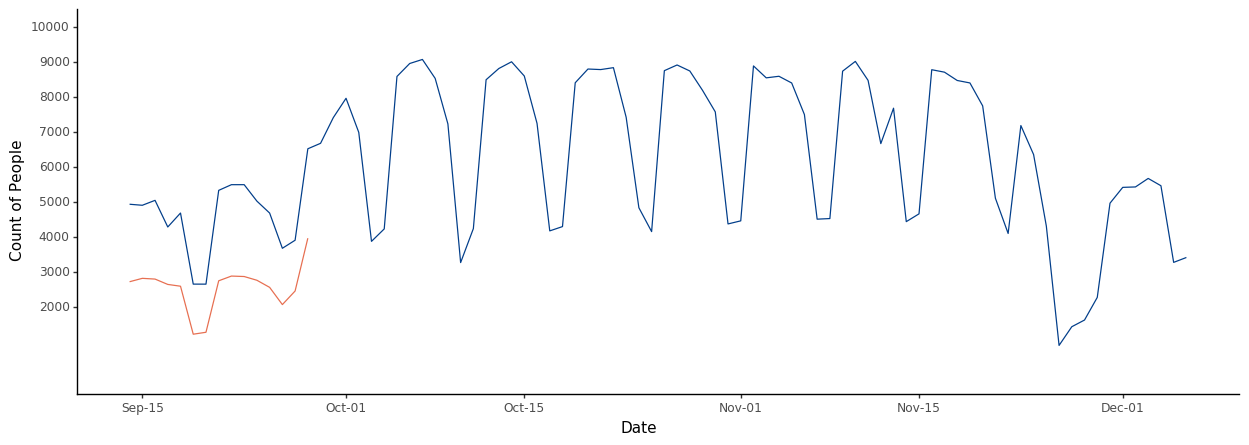

<ggplot: (122950695267)>

In [43]:
(
    ggplot(dailycounts ,aes(x="time" , y="count"))
    + geom_line(aes(color="macbased" , group="macbased"))
    #+ stat_smooth(color="blue", geom='line', alpha=0.4, se=False)
    #+ annotate('text', x=dailycounts["time"].max() +  datetime.timedelta(days=2) , y = dailycounts["count"].max() , label="Mac Based" ,color="#023e8a")
    #+ annotate('text', x=access_count["time"].max() +  datetime.timedelta(days=3) , y = access_count["count"].max()-500 , label="Access Card Based" ,color="#e76f51")
    #+ geom_line(access_count.groupby("EventDateTime")["access_count"].sum().reset_index() , aes(x="EventDateTime" , y="access_count") , color="red")
    + mt
    + scale_y_continuous(breaks=np.arange(2000,12000,1000) , limits=(0,10000))
    + scale_color_manual(labels=[ "Access Card" , "Device based" ] , values=["#e76f51" , "#023e8a"], guide=False)
    + scale_x_datetime(date_break="7 days" , date_labels="%b-%d")
    #+ ggtitle("MAC based vs Access Card (Total Across Campus)")
    + xlab("Date")
    + ylab("Count of People")
    + theme(legend_title=element_blank())
    + theme(axis_line = element_line() , panel_grid_minor=element_blank() ,panel_grid_major=element_blank())
)

In [388]:
df

,mac,time,building,date,day,week,time_of_day
0,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:15:00,Storrs,9-14,0,38,09:15:00
1,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:30:00,Storrs,9-14,0,38,09:30:00
2,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:45:00,Storrs,9-14,0,38,09:45:00
3,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 10:00:00,Storrs,9-14,0,38,10:00:00
4,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 11:00:00,Storrs,9-14,0,38,11:00:00
...,...,...,...,...,...,...,...
57939,fe:f6:79:52:9c:b9,2020-10-28 20:15:00,McMillan Greenhouse,10-28,2,44,20:15:00
57940,fe:f9:b1:2a:64:e7,2020-10-28 18:15:00,Fretwell,10-28,2,44,18:15:00
57941,fe:f9:b1:2a:64:e7,2020-10-28 18:30:00,Prospector,10-28,2,44,18:30:00
57942,fe:f9:b1:2a:64:e7,2020-10-28 18:45:00,Smith,10-28,2,44,18:45:00


In [440]:
weekend_num = df[df["day"].isin([5,6])].groupby(["date" , "day"])["mac"].nunique().reset_index()
weekend_num["date"] = pd.to_datetime(weekend_num["date"] , format="%m-%d")
weekend_num["day"] = weekend_num["day"].astype("category")
weekend_num["mac"] = weekend_num["mac"]*mac_to_person_const

In [442]:
weekend_num

,date,day,mac
0,1900-10-10,5,3255.137255
1,1900-10-11,6,4225.725490
2,1900-10-17,5,4161.019608
3,1900-10-18,6,4283.529412
4,1900-10-24,5,4821.882353
5,1900-10-25,6,4140.313725
6,1900-10-03,5,3861.647059
7,1900-10-04,6,4217.098039
8,1900-09-19,5,2640.000000
9,1900-09-20,6,2639.137255


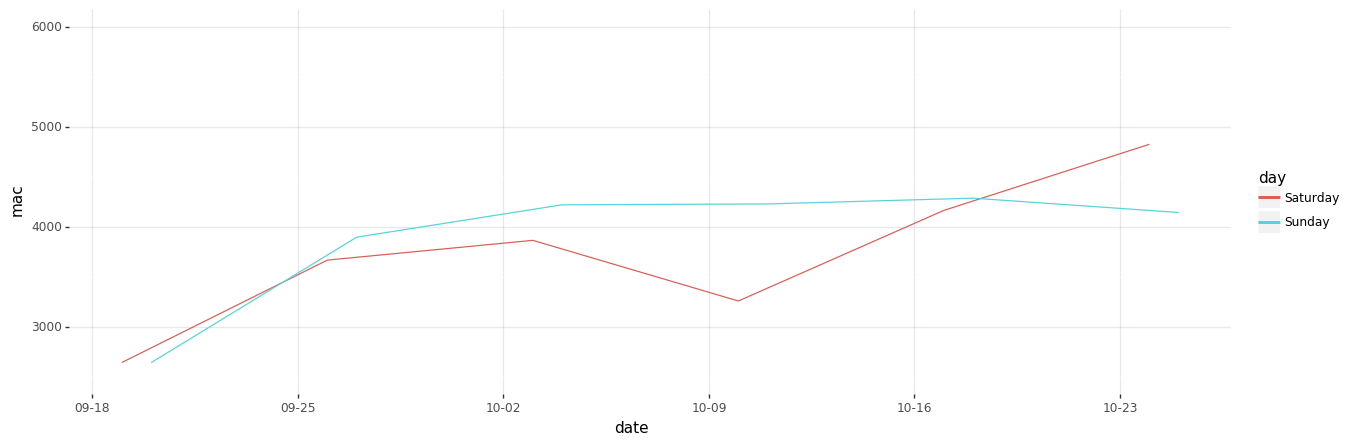

<ggplot: (119372476017)>

In [443]:
(
    ggplot(weekend_num
           ,aes(x="date" , y="mac" , group="day" , color="day"))
    + geom_line()
    + scale_x_datetime(date_labels="%m-%d" , date_breaks="7 days")
    + scale_y_continuous(limits=(2500,6000))
    + scale_color_discrete(labels=["Saturday" , "Sunday"])
    + mt
)

In [389]:
df[df["date"] == "10-22"].groupby(["time" , "building"])["mac"].nunique().reset_index().groupby("building")["mac"].max().sort_values(ascending=False)[:10]

building
South Village Crossing          169
University Recreation Center    147
Cameron Hall                    117
NRFC Fieldhouse                 103
EPIC                             74
Lynch Hall                       70
Popp Martin Student Union        62
Burson                           57
Fretwell                         56
Smith                            53
Name: mac, dtype: int64

In [390]:
building_order = df[df["date"] == "10-22"].groupby(["time" , "building"])["mac"].nunique().reset_index().groupby("building")["mac"].max().sort_values(ascending=False).index.values.astype(str)
building_order[:10]

array(['South Village Crossing', 'University Recreation Center',
       'Cameron Hall', 'NRFC Fieldhouse', 'EPIC', 'Lynch Hall',
       'Popp Martin Student Union', 'Burson', 'Fretwell', 'Smith'],
      dtype='<U37')

In [391]:
df["building"] = df["building"].astype("category").cat.reorder_categories(building_order)

In [392]:
buildcounts = get_daily_counts(df , ["building"])

In [393]:
buildcounts["building"] = buildcounts["building"].astype("category").cat.reorder_categories(building_order)

In [394]:
buildcounts["maxbar"] = 1800

In [395]:
building_coord = pd.read_excel("buildings_with_address_coords.xls")
building_coord.head()

,BUILDING_ID,BUILDING_NAME,BUILDING_U,ADDRESS_1,LATITUDE,LONGITUDE
0,96,University Recreation Center,,8827 CRAVER RD,35.308287,-80.735173
1,93,New Receiving and Stores,SERVICE,9647 POPLAR LN,35.314382,-80.733833
2,92,New Facilities Ops and Parking (FOPS),SERVICE,9643 POPLAR LN,35.314309,-80.732666
3,3012,Carriage House,RESIDENTIAL,,35.301073,-80.739435
4,91,Price Counseling Center,Student Services,9502 Poplar Terrace Dr,35.310229,-80.730045


In [396]:
buildcounts.head()

,time,building,count,maxbar
0,2020-09-14,South Village Crossing,171.686275,1800
1,2020-09-14,University Recreation Center,936.078431,1800
2,2020-09-14,Cameron Hall,276.941176,1800
3,2020-09-14,NRFC Fieldhouse,364.941176,1800
4,2020-09-14,EPIC,368.392157,1800


In [397]:
bc = pd.merge(buildcounts , building_coord , left_on=["building"] , right_on=["BUILDING_NAME"] , how="left")
bc["isres"] = bc["BUILDING_U"] == "RESIDENTIAL"

In [398]:
bc["building"] = bc["building"].astype("category").cat.reorder_categories(building_order)

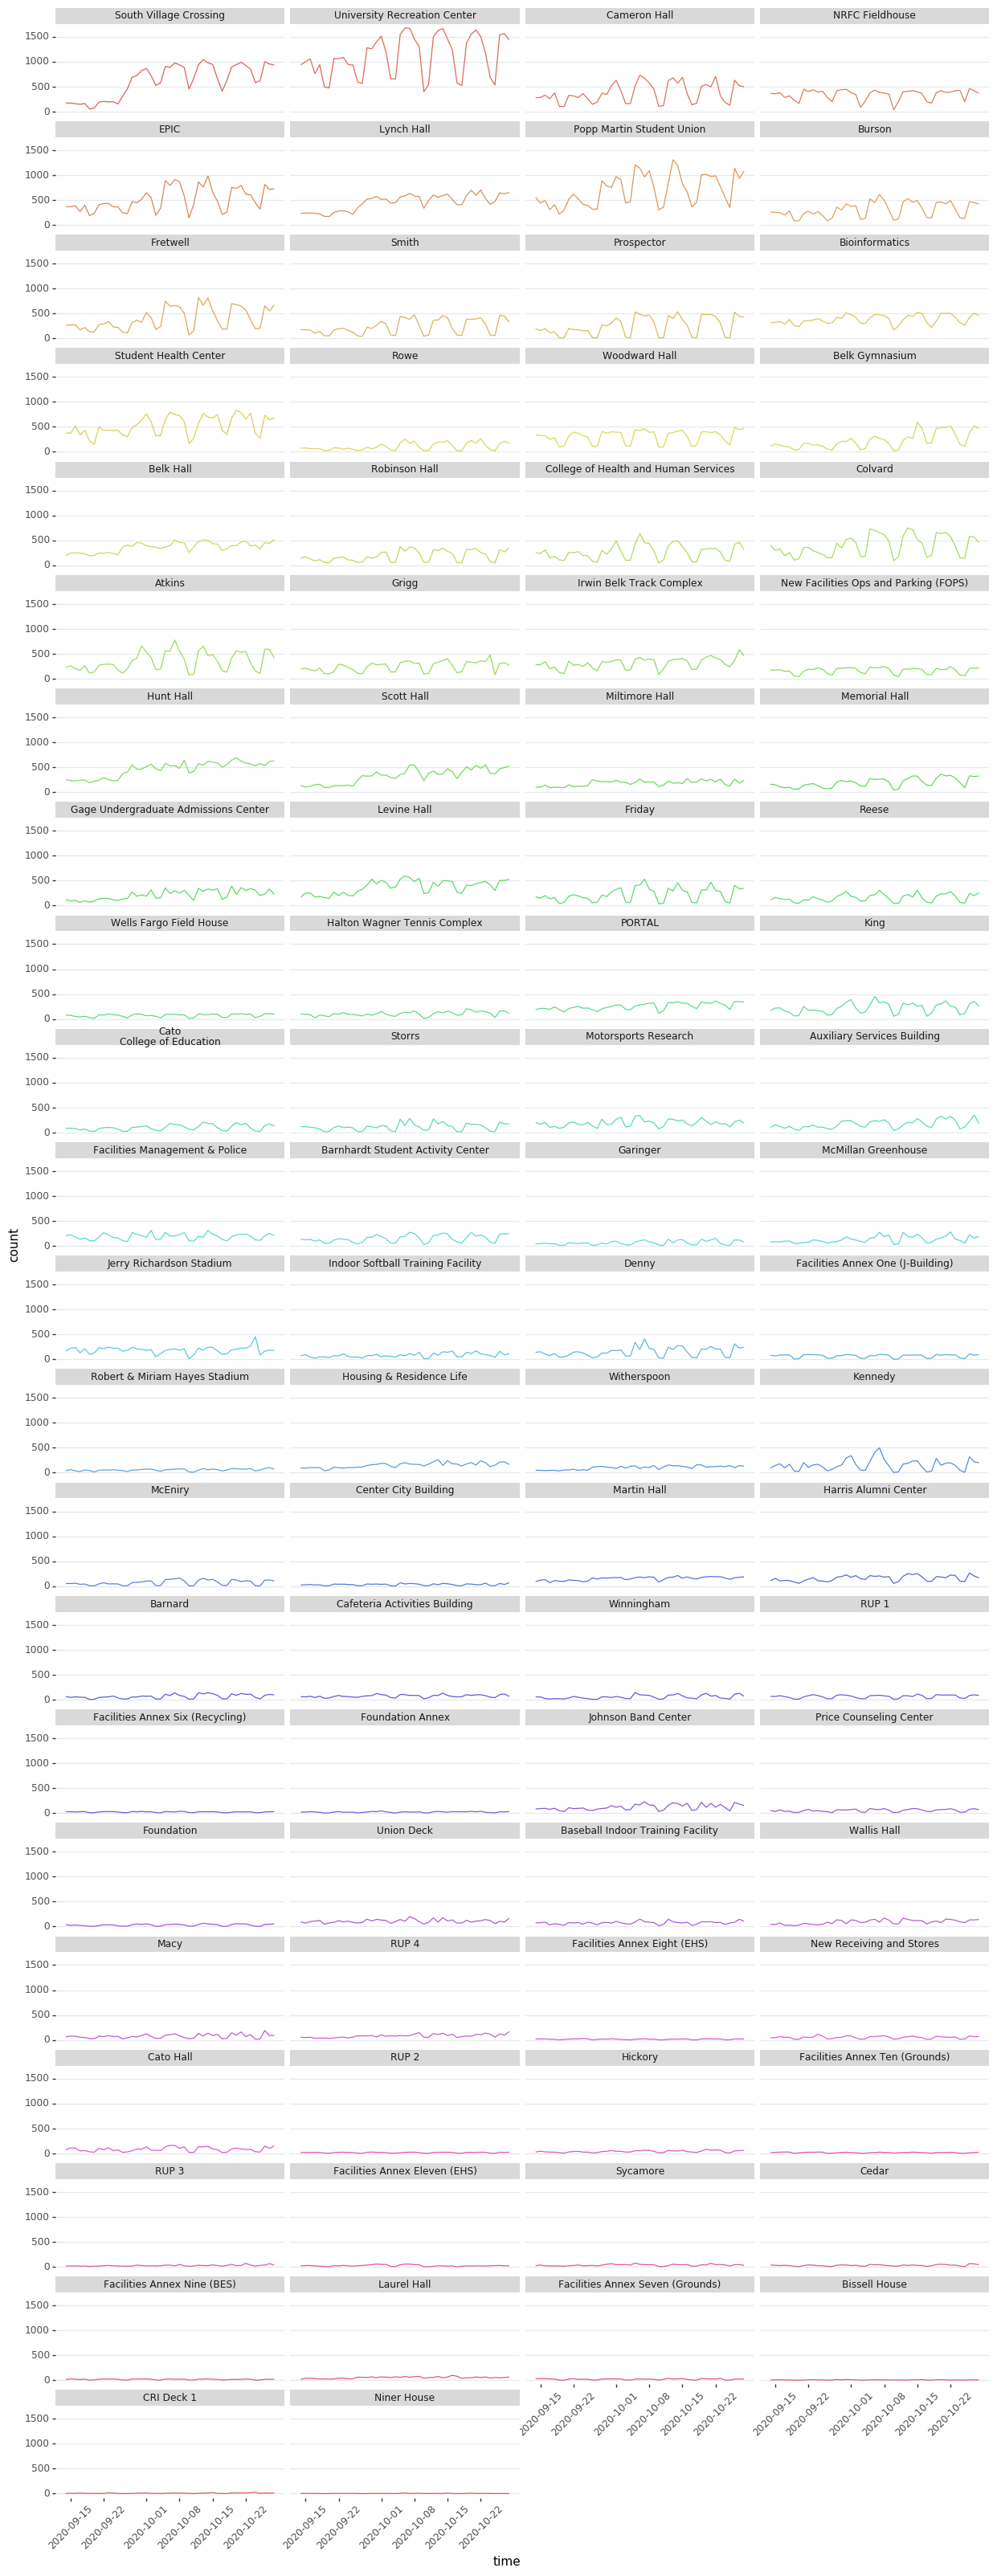

<ggplot: (119329008150)>

In [399]:
(
    ggplot(bc ,aes(x="time" , y="count"))
    + geom_line(aes(color="building" , group="building"))
    # + stat_smooth(color="blue", geom='line', alpha=0.4, se=False)
    + facet_wrap("~ building" , ncol=4)
    #+ geom_hline(aes(yintercept="maxbar", color="isres") , size=4)
    + mt
    #+ ggtitle("Building Wise Daily Trends (9/14 - 10/22)")
#     + xlab("Date")
#     + ylab("Count")
    + scale_color_discrete(guide=False)
    + theme(figure_size=(15,40) , legend_title=element_blank() , axis_text_x = element_text(rotation=45))
    + theme(panel_grid_major_x=element_blank())
)


In [400]:
df

,mac,time,building,date,day,week,time_of_day
0,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:15:00,Storrs,9-14,0,38,09:15:00
1,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:30:00,Storrs,9-14,0,38,09:30:00
2,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:45:00,Storrs,9-14,0,38,09:45:00
3,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 10:00:00,Storrs,9-14,0,38,10:00:00
4,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 11:00:00,Storrs,9-14,0,38,11:00:00
...,...,...,...,...,...,...,...
57939,fe:f6:79:52:9c:b9,2020-10-28 20:15:00,McMillan Greenhouse,10-28,2,44,20:15:00
57940,fe:f9:b1:2a:64:e7,2020-10-28 18:15:00,Fretwell,10-28,2,44,18:15:00
57941,fe:f9:b1:2a:64:e7,2020-10-28 18:30:00,Prospector,10-28,2,44,18:30:00
57942,fe:f9:b1:2a:64:e7,2020-10-28 18:45:00,Smith,10-28,2,44,18:45:00


In [401]:
weeki = 43
weekdf = df[df["week"].isin([weeki ,38])]
weekdf = time_cols(get_daily_counts(weekdf , ["building"]))
weekdf

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,time,building,count,date,day,week,time_of_day
0,2020-09-14,South Village Crossing,171.686275,9-14,0,38,00:00:00
1,2020-09-14,University Recreation Center,936.078431,9-14,0,38,00:00:00
2,2020-09-14,Cameron Hall,276.941176,9-14,0,38,00:00:00
3,2020-09-14,NRFC Fieldhouse,364.941176,9-14,0,38,00:00:00
4,2020-09-14,EPIC,368.392157,9-14,0,38,00:00:00
...,...,...,...,...,...,...,...
1191,2020-10-25,Laurel Hall,54.352941,10-25,6,43,00:00:00
1192,2020-10-25,Facilities Annex Seven (Grounds),1.725490,10-25,6,43,00:00:00
1193,2020-10-25,Bissell House,2.588235,10-25,6,43,00:00:00
1194,2020-10-25,CRI Deck 1,1.725490,10-25,6,43,00:00:00


In [402]:
#weekdf["building"] = weekdf["building"].astype("category").cat.reorder_categories(weekdf.groupby("building")["count"].max().sort_values(ascending=False).index.values.astype(str))

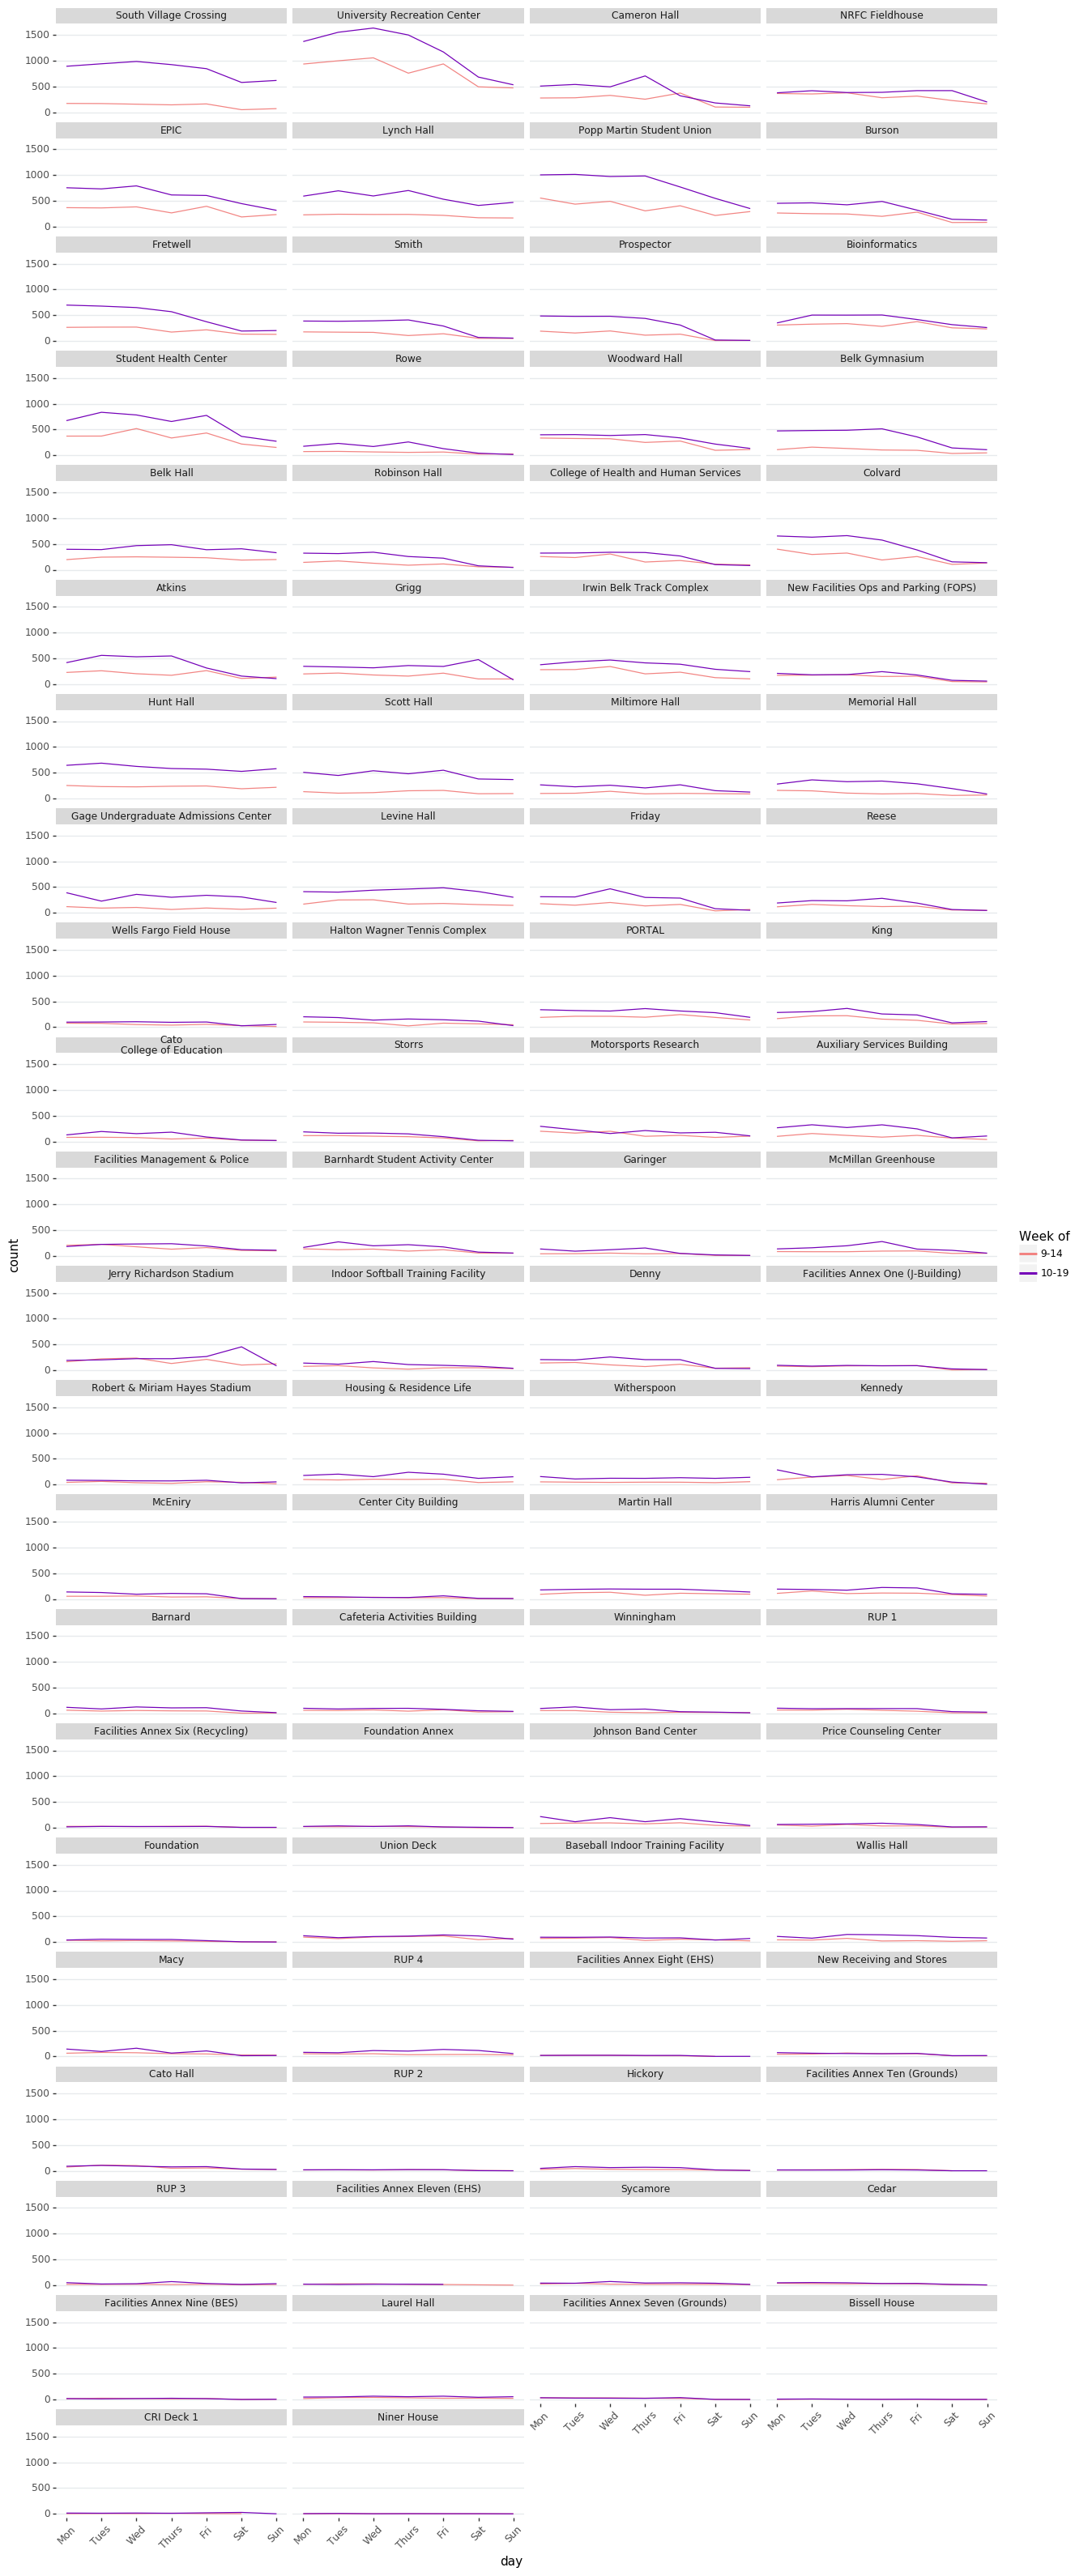

<ggplot: (-9223371917528781508)>

In [403]:
(
    ggplot(weekdf , aes(x="day" , y="count" , group="week",color="week" ))
    + geom_line()
    + mt
    + facet_wrap("~ building" , ncol=4)
    + scale_x_continuous(breaks=np.arange(0,7) , labels= ["Mon" , "Tues" , "Wed" , "Thurs" , "Fri" , "Sat" , "Sun"])
    #+ theme(figure_size=(15,8) , panel_grid_minor=element_blank())
    + scale_color_manual(labels = weekdf.groupby("week").head(1)["date"].values , values=[ "#f28482" , "#7400b8"])
    #+ ggtitle("Week vs Week - Total MAC based counts")
    + theme(figure_size=(15,40) 
            , legend_title=element_text(text="Week of") 
            , axis_text_x = element_text(rotation=45)
           , panel_grid_major_x = element_blank())
)

In [404]:
df["date"].unique()[-1]

'10-28'

In [405]:
lastday = df[df["date"] == '10-22']
lastday = lastday[lastday["building"] != 'Cato\nCollege of Education']
lastday = lastday.groupby(["time_of_day" , "building"])["mac"].nunique().reset_index()
lastday["time_of_day"] = pd.to_datetime(lastday["time_of_day"] , format="%H:%M:%S")

In [406]:
lastday.groupby("building")["mac"].max().sort_values(ascending=False)

building
South Village Crossing              169
University Recreation Center        147
Cameron Hall                        117
NRFC Fieldhouse                     103
EPIC                                 74
                                   ... 
Facilities Annex Seven (Grounds)      3
Bissell House                         3
CRI Deck 1                            2
Niner House                           2
Cato\nCollege of Education            0
Name: mac, Length: 86, dtype: int64

In [407]:
#lastday["building"] = lastday["building"].astype("category").cat.reorder_categories(lastday.groupby("building")["mac"].max().sort_values(ascending=False).index.astype(str))

In [408]:
len(lastday["building"].cat.categories.values)

86

In [409]:
[c for c in lastday["building"].unique() if c.lower().find("cato") > -1]

['Cato\nCollege of Education', 'Cato Hall']

In [410]:
set(lastday["building"].cat.categories.values).difference(set(bc["building"].unique()))

set()

In [411]:
lastday["time_of_day"].unique()[::10]

[1900-01-01 00:00:00, 1900-01-01 02:30:00, 1900-01-01 05:00:00, 1900-01-01 07:30:00, 1900-01-01 10:00:00, 1900-01-01 12:30:00, 1900-01-01 15:00:00, 1900-01-01 17:30:00, 1900-01-01 20:00:00, 1900-01-01 22:30:00]
Categories (96, datetime64[ns]): [1900-01-01 00:00:00, 1900-01-01 00:15:00, 1900-01-01 00:30:00, 1900-01-01 00:45:00, ..., 1900-01-01 23:00:00, 1900-01-01 23:15:00, 1900-01-01 23:30:00, 1900-01-01 23:45:00]

In [412]:
lastday.dtypes

time_of_day    category
building       category
mac               int64
dtype: object

In [413]:
lastdayagg = lastday.groupby("time_of_day")["mac"].sum().reset_index()
lastdayagg["time_of_day"] = pd.to_datetime(lastdayagg["time_of_day"] , format="%H:%M:%S")

In [414]:
maxpoint = lastdayagg[lastdayagg["mac"] == lastdayagg["mac"].max()]
maxpoint

,time_of_day,mac
51,1900-01-01 12:45:00,1487


C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\scales\scale.py:103: PlotnineWarning: scale_x_datetime could not recognise parameter `date_break`


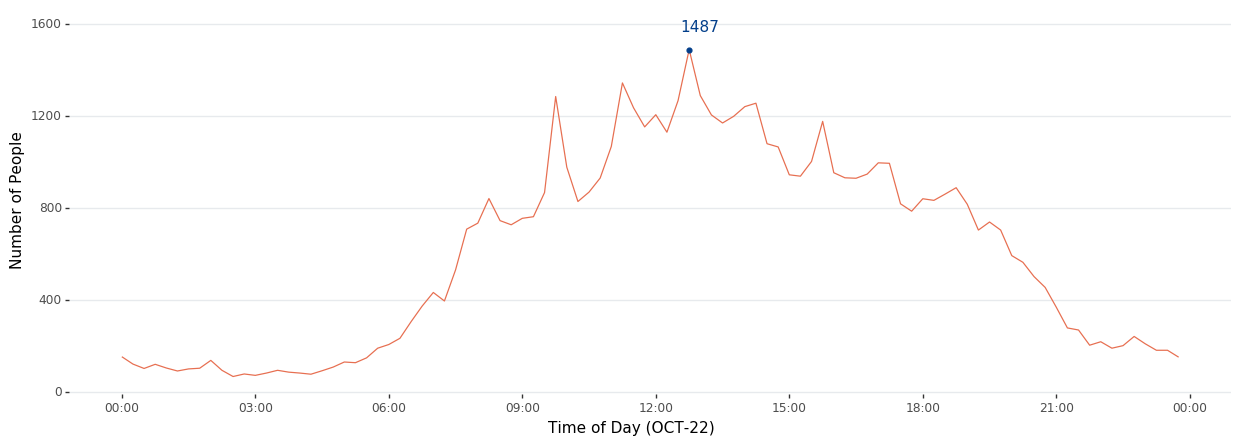

<ggplot: (119359509494)>

In [415]:

(
    ggplot(lastdayagg , aes(x="time_of_day" , y="mac" , group=1))
    + geom_line(color="#e76f51")
    + annotate('point', x=maxpoint["time_of_day"]  , y = maxpoint["mac"] ,color="#023e8a")
    + annotate('text', x=maxpoint["time_of_day"] + datetime.timedelta(minutes=15) , y = maxpoint["mac"]+100 , label=f"{maxpoint['mac'].values[0]}" ,color="#023e8a")
    + mt
    + scale_x_datetime(date_break="2 hours" , date_labels="%H:%M")#breaks = lastday["time_of_day"].unique()[::10])
    #+ ggtitle("Campus Wide Intraday Trend of Number of Students")
    + xlab("Time of Day (OCT-22)")
    + ylab("Number of People")
    + theme(panel_grid_major_x=element_blank())
)

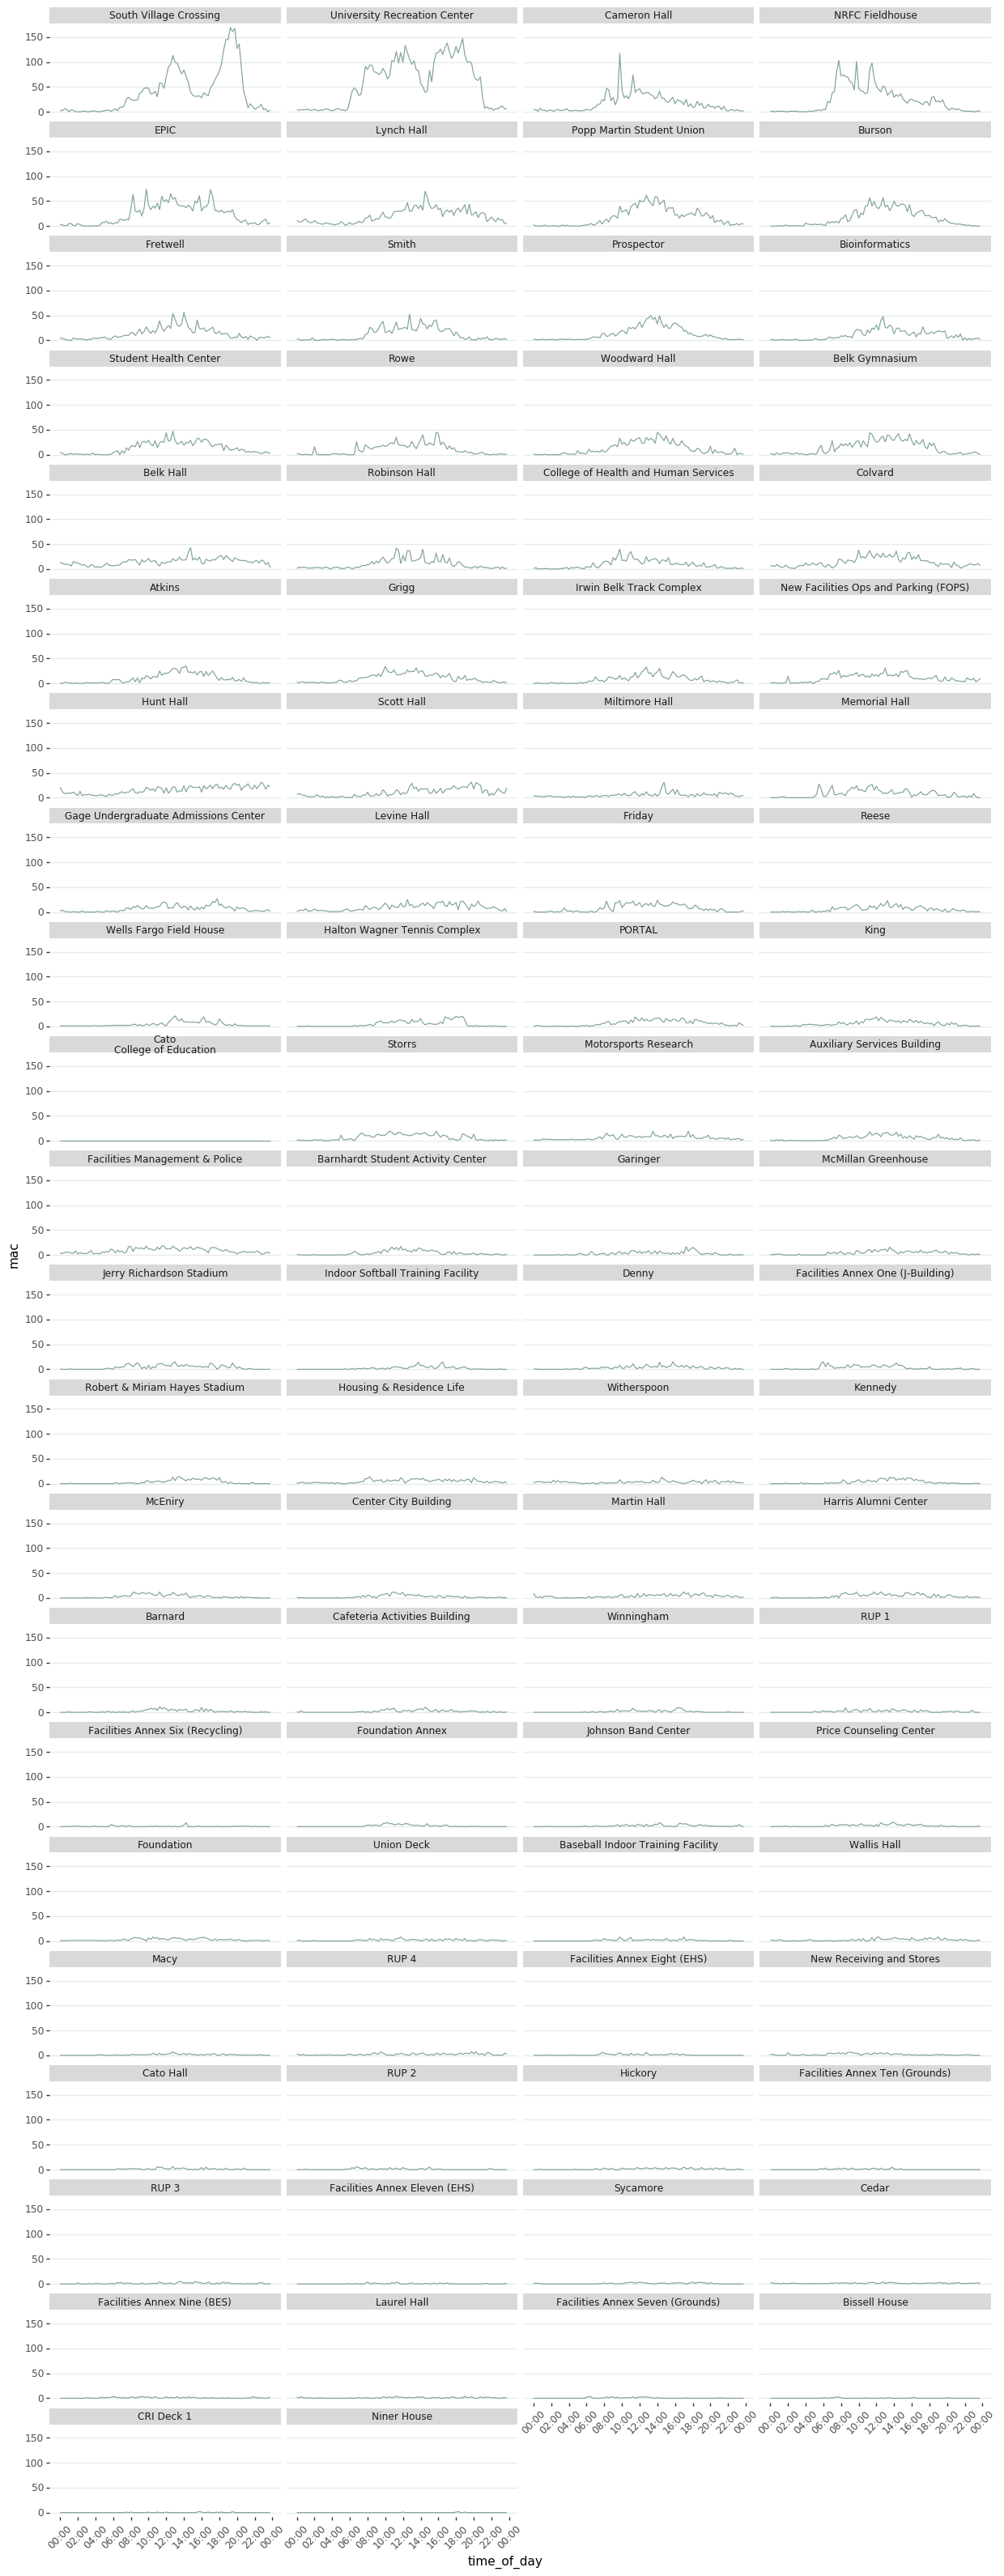

<ggplot: (119359516136)>

In [416]:
(
    ggplot(lastday, aes(x="time_of_day", y="mac"  , group="building" ) )
    + geom_line(color="#84a59d")
    + facet_wrap("~ building" , ncol=4)
    + scale_color_discrete(guide=False)
    #+ ggtitle("Intraday Building Wise Student count")
    + scale_x_datetime(date_labels="%H:%M" , date_breaks="2 hours")
    #+ scale_y_continuous(limits=(0,55))
    + mt
    + theme(figure_size=(15,40) 
            , legend_title=element_text(text="Week of") 
            ,panel_grid_major_x=element_blank()
            , axis_text_x = element_text(rotation=45))
    
)

In [251]:
list(lastday["building"].unique()[:20])

['University Recreation Center',
 'Popp Martin Student Union',
 'South Village Crossing',
 'Student Health Center',
 'EPIC',
 'Hunt Hall',
 'Lynch Hall',
 'Colvard',
 'Fretwell',
 'Bioinformatics',
 'Cameron Hall',
 'Levine Hall',
 'Belk Hall',
 'Atkins',
 'NRFC Fieldhouse',
 'Scott Hall',
 'Woodward Hall',
 'Irwin Belk Track Complex',
 'Burson',
 'College of Health and Human Services']

In [252]:
commons = [ 'University Recreation Center' , 'Popp Martin Student Union' , 'South Village Crossing' , 'NRFC Fieldhouse']
acad = ['Atkins',"EPIC" , "Fretwell", "Cameron Hall"] #replace , ]

In [253]:
commonsdf = lastday[lastday["building"].isin(commons)]
commonsdf

,time_of_day,building,mac
0,1900-01-01 00:00:00,University Recreation Center,4
1,1900-01-01 00:00:00,Popp Martin Student Union,3
2,1900-01-01 00:00:00,South Village Crossing,3
14,1900-01-01 00:00:00,NRFC Fieldhouse,1
86,1900-01-01 00:15:00,University Recreation Center,3
...,...,...,...
8098,1900-01-01 23:30:00,NRFC Fieldhouse,2
8170,1900-01-01 23:45:00,University Recreation Center,5
8171,1900-01-01 23:45:00,Popp Martin Student Union,4
8172,1900-01-01 23:45:00,South Village Crossing,3


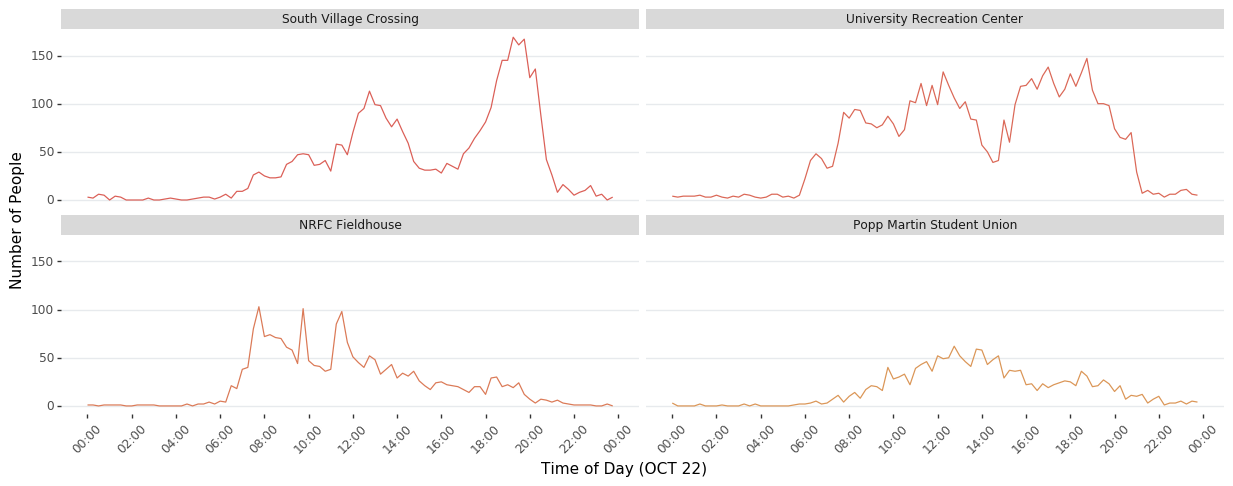

<ggplot: (-9223371917528675254)>

In [254]:
(
    ggplot(lastday[lastday["building"].isin(commons)], aes(x="time_of_day", y="mac"  , group="building" , color="building"))
    + geom_line()
    + facet_wrap("~ building" , ncol=2)
    + scale_color_discrete(guide=False)
    #+ ggtitle("'Common' buildings Intraday counts")
    + xlab("Time of Day (OCT 22)")
    + ylab("Number of People")
    + scale_x_datetime(date_labels="%H:%M" , date_breaks="2 hours")
    + mt
    + theme(figure_size=(15,5) 
            , legend_title=element_text(text="Week of") 
            ,panel_grid_major_x=element_blank()
            ,axis_text_x = element_text(rotation=45)
           )
    
)

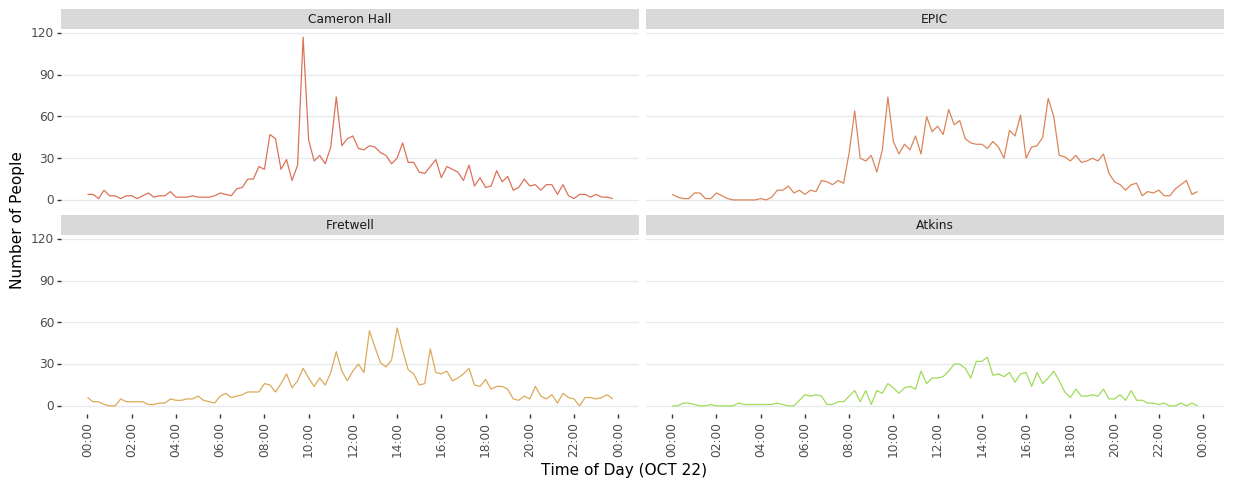

<ggplot: (-9223371917526623628)>

In [258]:
(
    ggplot(lastday[lastday["building"].isin(acad)], aes(x="time_of_day", y="mac"  , group="building" , color="building"))
    + geom_line()
    + facet_wrap("~ building" , ncol=2)
    + scale_color_discrete(guide=False)
    #+ ggtitle("'Academic' buildings Intraday counts")
    + xlab("Time of Day (OCT 22)")
    + ylab("Number of People")
    + scale_x_datetime(date_labels="%H:%M" , date_breaks="2 hours")
    + mt
    + theme(figure_size=(15,5) 
            , legend_title=element_text(text="Week of") 
            ,panel_grid_major_x=element_blank()
            , axis_text_x = element_text(rotation=90))
    
)

In [50]:
building_coord

,BUILDING_ID,BUILDING_NAME,BUILDING_U,ADDRESS_1,LATITUDE,LONGITUDE
0,96,University Recreation Center,,8827 CRAVER RD,35.308287,-80.735173
1,93,New Receiving and Stores,SERVICE,9647 POPLAR LN,35.314382,-80.733833
2,92,New Facilities Ops and Parking (FOPS),SERVICE,9643 POPLAR LN,35.314309,-80.732666
3,3012,Carriage House,RESIDENTIAL,,35.301073,-80.739435
4,91,Price Counseling Center,Student Services,9502 Poplar Terrace Dr,35.310229,-80.730045
...,...,...,...,...,...,...
135,74,NRFC Fieldhouse,ATHLETICS,1001 JOHN KIRK DR,35.313428,-80.723201
136,1008,North Deck,PARKING,9628 POPLAR LN,35.313491,-80.731485
137,1001,Cone Deck 1,PARKING,8919 UNIVERSITY RD,35.304514,-80.734578
138,1002,Cone Deck 2,PARKING,8921 UNIVERSITY RD,35.304908,-80.734367


In [221]:
from sklearn.metrics import pairwise_distances
distdf = pd.DataFrame(pairwise_distances(building_coord[["LATITUDE" , "LONGITUDE"]])
                      , index=building_coord["BUILDING_NAME"] 
                      , columns= building_coord["BUILDING_NAME"] )

In [222]:
distdf

BUILDING_NAME,University Recreation Center,New Receiving and Stores,New Facilities Ops and Parking (FOPS),Carriage House,Price Counseling Center,Facilities Annex Ten (Grounds),BES Recycling Shed,Police Storage,Hauser Alumni Pavilion,Johnson Band Center,...,Greek 10,CRI Deck 1,East Deck 1,Robert & Miriam Hayes Stadium,Field 13 Support Building,NRFC Fieldhouse,North Deck,Cone Deck 1,Cone Deck 2,PORTAL
BUILDING_NAME,,,,,,,,,,,,,,,,,,,,,
University Recreation Center,0.000000,0.006241,0.006523,0.008379,0.005483,0.007034,0.007204,0.006810,0.001720,0.007682,...,0.010611,0.008283,0.008410,0.004511,0.005771,0.013029,0.006378,0.003819,0.003473,0.008538
New Receiving and Stores,0.006241,0.000000,0.001169,0.014440,0.005621,0.004397,0.004774,0.004770,0.006567,0.011499,...,0.008269,0.010902,0.011483,0.008147,0.009802,0.010675,0.002511,0.009896,0.009489,0.009568
New Facilities Ops and Parking (FOPS),0.006523,0.001169,0.000000,0.014866,0.004849,0.003306,0.003683,0.003730,0.007122,0.010965,...,0.007107,0.011908,0.010821,0.008973,0.010627,0.009506,0.001436,0.009979,0.009553,0.010674
Carriage House,0.008379,0.014440,0.014866,0.000000,0.013115,0.015182,0.015282,0.014849,0.007914,0.011091,...,0.018222,0.009020,0.012475,0.007625,0.006683,0.020401,0.014745,0.005952,0.006356,0.011189
Price Counseling Center,0.005483,0.005621,0.004849,0.013115,0.000000,0.002549,0.002457,0.002015,0.007027,0.006298,...,0.005184,0.013405,0.005998,0.009742,0.011173,0.007555,0.003565,0.007294,0.006855,0.013045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NRFC Fieldhouse,0.013029,0.010675,0.009506,0.020401,0.007555,0.006578,0.006257,0.006512,0.014511,0.010887,...,0.002509,0.020652,0.009663,0.017132,0.018639,0.000001,0.008285,0.014453,0.014045,0.019886
North Deck,0.006378,0.002511,0.001436,0.014745,0.003565,0.001887,0.002264,0.002294,0.007302,0.009814,...,0.005828,0.012682,0.009563,0.009483,0.011112,0.008285,0.000000,0.009495,0.009053,0.011667
Cone Deck 1,0.003819,0.009896,0.009979,0.005952,0.007294,0.009558,0.009601,0.009154,0.004650,0.005840,...,0.012312,0.009983,0.007058,0.006584,0.007034,0.014453,0.009495,0.000000,0.000447,0.011062


In [199]:
ldf = pd.merge(df , building_coord , left_on="building" , right_on="BUILDING_NAME" , how="inner")
ldf

,mac,time,building,date,day,week,time_of_day,BUILDING_ID,BUILDING_NAME,BUILDING_U,ADDRESS_1,LATITUDE,LONGITUDE
0,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:15:00,Storrs,9-14,0,38,09:15:00,41,Storrs,Instruction & Research,9115 Mary Alexander Rd,35.304606,-80.729157
1,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:30:00,Storrs,9-14,0,38,09:30:00,41,Storrs,Instruction & Research,9115 Mary Alexander Rd,35.304606,-80.729157
2,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:45:00,Storrs,9-14,0,38,09:45:00,41,Storrs,Instruction & Research,9115 Mary Alexander Rd,35.304606,-80.729157
3,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 10:00:00,Storrs,9-14,0,38,10:00:00,41,Storrs,Instruction & Research,9115 Mary Alexander Rd,35.304606,-80.729157
4,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 11:00:00,Storrs,9-14,0,38,11:00:00,41,Storrs,Instruction & Research,9115 Mary Alexander Rd,35.304606,-80.729157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333880,e0:33:8e:41:2b:e7,2020-10-14 15:15:00,CRI Deck 1,10-14,2,42,15:15:00,1009,CRI Deck 1,PARKING,9100 ROBERT D SNYDER RD,35.309170,-80.743409
1333881,e0:33:8e:b9:a9:c4,2020-10-14 10:45:00,CRI Deck 1,10-14,2,42,10:45:00,1009,CRI Deck 1,PARKING,9100 ROBERT D SNYDER RD,35.309170,-80.743409
1333882,e0:89:7e:00:78:5d,2020-10-14 15:00:00,CRI Deck 1,10-14,2,42,15:00:00,1009,CRI Deck 1,PARKING,9100 ROBERT D SNYDER RD,35.309170,-80.743409
1333883,e4:0e:ee:47:50:bf,2020-10-14 13:00:00,CRI Deck 1,10-14,2,42,13:00:00,1009,CRI Deck 1,PARKING,9100 ROBERT D SNYDER RD,35.309170,-80.743409


C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.


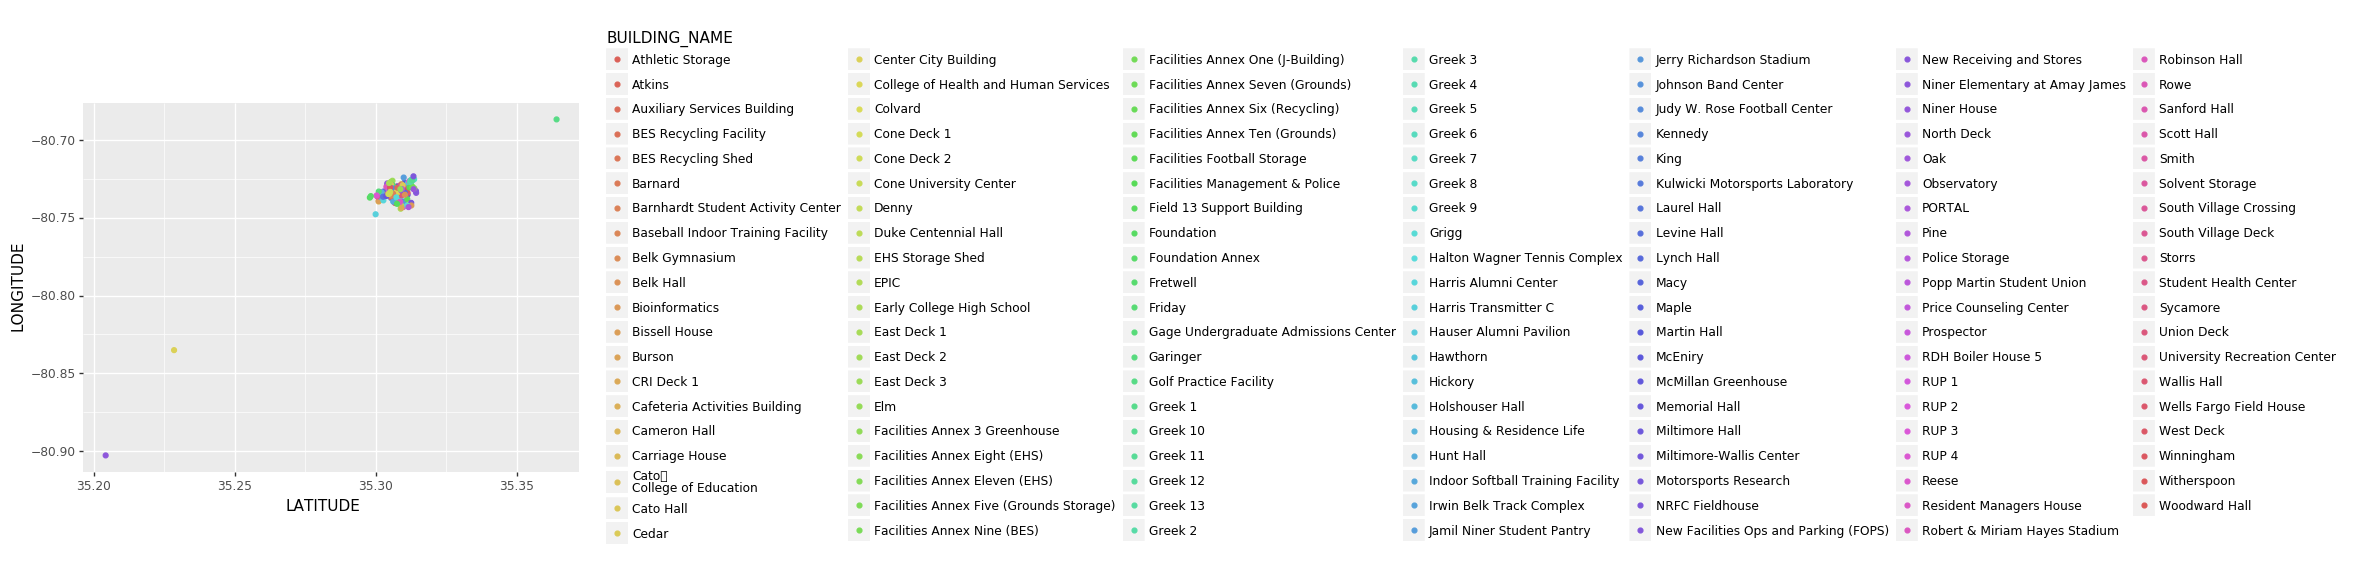

<ggplot: (110521660287)>

In [193]:
(
    ggplot(building_coord , aes(x="LATITUDE" , y="LONGITUDE" , color="BUILDING_NAME"))
     + geom_point()
)

In [226]:
subdf["building"].unique()

array(['Prospector', 'University Recreation Center', 'Lynch Hall',
       'Halton Wagner Tennis Complex', 'Wallis Hall'], dtype=object)

In [236]:
subdf = ldf[(ldf["date"] == "10-5") & (ldf["mac"] == "6e:ca:fd:1f:86:0a")]
buildorder = distdf[subdf.sort_values("time").iloc[0]["building"]][subdf["building"].unique()].reset_index().drop_duplicates()["BUILDING_NAME"].values
subdf["building"] = subdf["building"].astype("category").cat.reorder_categories(buildorder) 

array(['Prospector', 'University Recreation Center', 'Lynch Hall',
       'Halton Wagner Tennis Complex', 'Wallis Hall'], dtype=object)

In [283]:
def dayinlifeGeo(df , mac , day="10-5"):
    sub = df[(df["date"] == day) & (df["mac"] == mac)].sort_values("time_of_day")
    #subdf = ldf[(ldf["date"] == "10-5") & (ldf["mac"] == "6e:ca:fd:1f:86:0a")]
    startbuild = sub.sort_values("time").iloc[0]["building"]
    buildorder = distdf[startbuild][sub["building"].unique()].sort_values().reset_index().drop_duplicates()["BUILDING_NAME"].values
    sub["building"] = sub["building"].astype("category").cat.reorder_categories(buildorder) 
    #print(sub)
    #print( distdf[startbuild][subdf["building"].unique()])
    #print(sub)
    p = (
       ggplot(sub , aes(x="time" , y="building"))
        + geom_point()
        + geom_line(group=1 , alpha=0.2)
       # + scale_x_discrete(breaks = np.arange(0,24,1))
        + scale_x_datetime(breaks='1 hour', date_labels="%H:%M") 
        + theme(axis_text_x=element_text(rotation=45))
        + mt
        + ggtitle(f"Day in Life of BOB - ({day})")
        + ylab(f"Building \n\n ( Increasing Distance from {startbuild} ----- > )")
    )
    print(p)


In [186]:
def dayinlife(df , mac , day="10-5"):
    sub = df[(df["date"] == day) & (df["mac"] == mac)]
    #print(sub)
    p = (
        ggplot(sub , aes(x="time" , y="building"))
        + geom_point()
        + geom_line(group=1 , alpha=0.2)
       # + scale_x_discrete(breaks = np.arange(0,24,1))
        + scale_x_datetime(breaks='1 hour', date_labels="%H:%M") 
        + theme(axis_text_x=element_text(rotation=45))
        + mt
        
    )
    print(p)

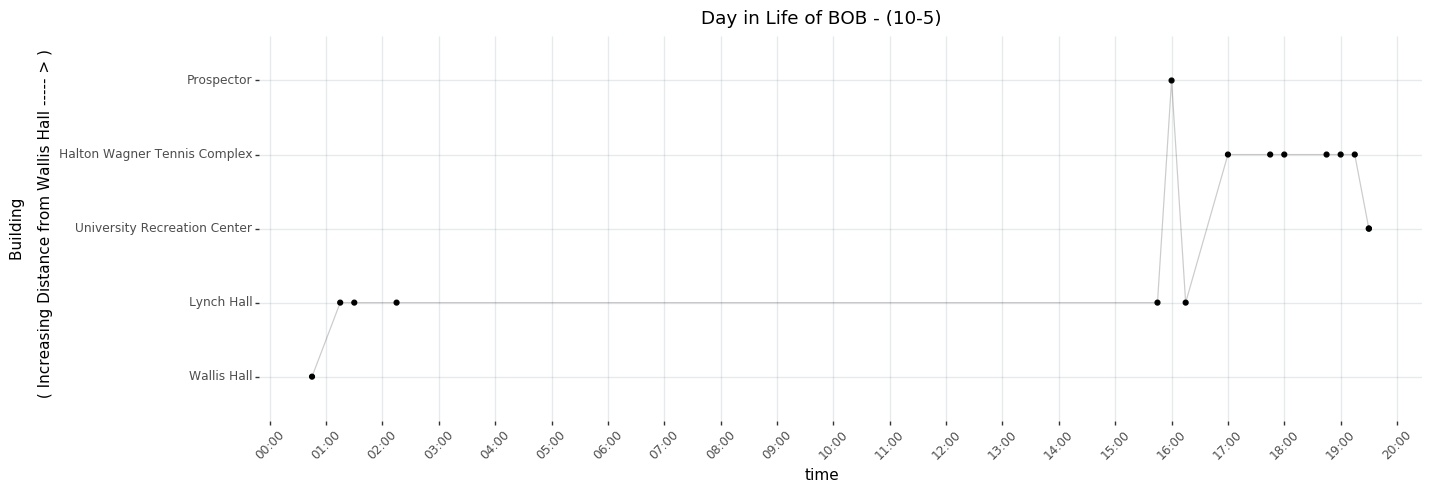

<ggplot: (110540990742)>


In [279]:
dayinlifeGeo(ldf , "6e:ca:fd:1f:86:0a")

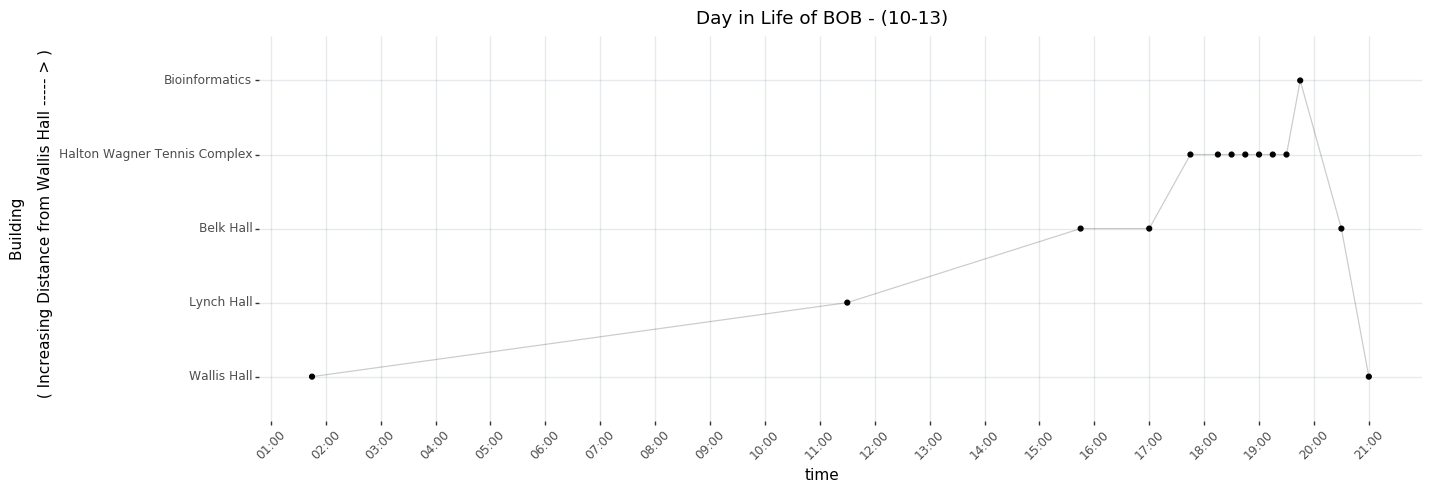

<ggplot: (-9223371926315600096)>


In [280]:
dayinlifeGeo(ldf , "6e:ca:fd:1f:86:0a" , day="10-13")

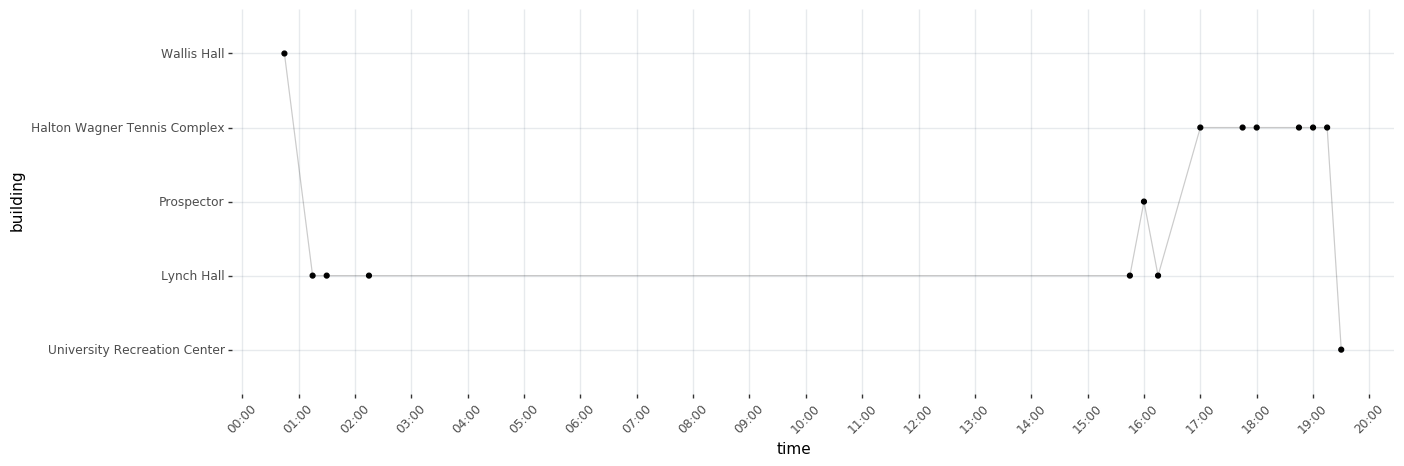

<ggplot: (110534184638)>


In [187]:
dayinlife(ldf , "6e:ca:fd:1f:86:0a")

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\geoms\geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


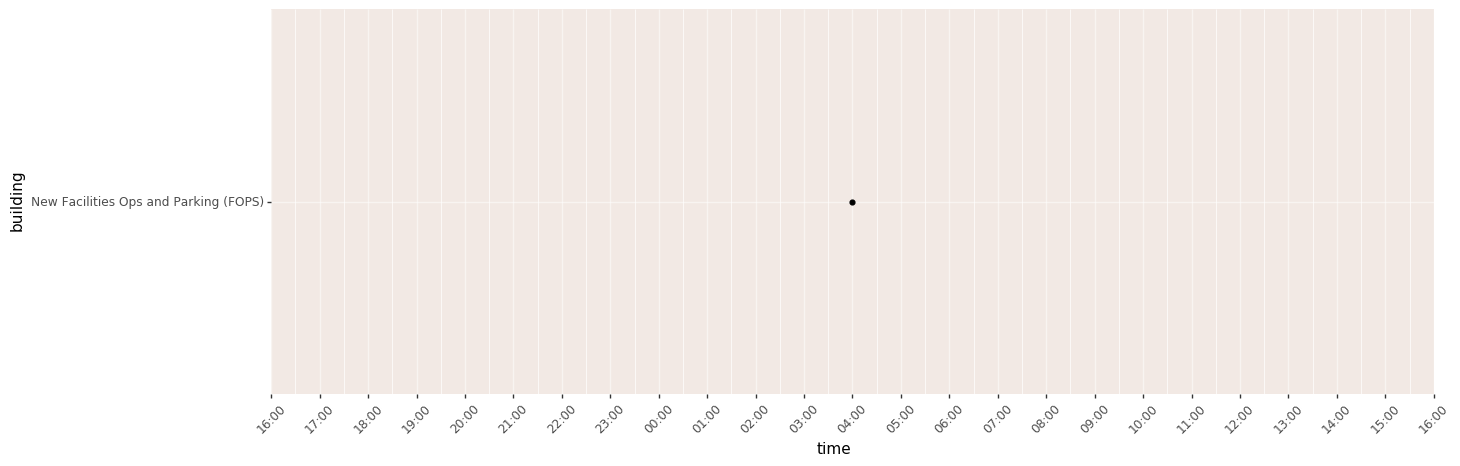

<ggplot: (-9223371875347925581)>


In [293]:
dayinlife(df , "c0:d3:c0:75:46:cd")

In [294]:
facmac = ['c0:33:5e:0d:da:8f', '04:e5:36:1a:ae:21', 'd8:c4:97:fe:2f:79',
       '64:5d:86:96:d4:26', 'd8:c4:97:fe:2d:e5', 'a4:e9:75:55:7c:61',
       '40:83:de:f6:d9:2b', '40:d3:ae:e7:84:8c', '00:5b:94:1a:58:5c',
       'a4:08:ea:25:86:07', '3c:cd:36:18:a6:85', 'd0:7f:a0:05:2d:fb',
       '90:b6:86:b6:a4:72', 'c0:d3:c0:61:59:8f', 'ce:6c:44:15:f1:04',
       'd8:c4:97:fd:73:d3', 'a4:08:ea:27:e6:13', 'c0:bd:c8:fc:36:ed',
       'c0:d3:c0:75:46:cd', 'd8:c4:97:fe:35:4f', '00:12:cc:00:24:49',
       'c0:d3:c0:61:59:d3', '00:12:cc:00:3c:3f', 'dc:f7:56:15:51:4e',
       'a4:6c:f1:e7:fa:75', 'b4:ae:2b:e5:06:06', '00:12:cc:00:43:db',
       '00:12:cc:00:26:71', 'd0:7f:a0:87:a8:73', '8c:c6:81:a5:f4:ec',
       '3a:cd:90:41:0b:b5', 'd8:c4:97:fe:37:d7', 'd8:c4:97:fd:78:e5',
       '0e:75:63:b2:0b:55', 'a4:08:ea:ab:a7:59', '28:56:5a:10:a7:c5',
       'd0:7f:a0:05:2e:47', '00:12:cc:00:22:69', 'c0:d3:c0:61:58:c3',
       '30:57:14:a1:41:30', 'ec:ce:d7:84:14:d2', '00:12:cc:00:42:52',
       'dc:f7:56:15:50:fe', '80:86:f2:8e:94:a5', '00:12:cc:00:24:0a',
       'a4:6c:f1:ab:43:cd', '00:12:cc:00:23:50', 'dc:f7:56:15:4e:86',
       '3c:dc:bc:e3:25:05', '24:18:1d:27:a3:ca', 'c0:d3:c0:6c:30:a9',
       'a4:08:ea:27:e1:71', '70:bc:10:6f:c6:2b', 'f8:2d:7c:b1:88:3d',
       '46:b6:73:05:63:80', 'c8:d0:83:6e:24:16', '6c:19:c0:60:15:a5',
       '70:3c:69:b1:bb:d3', 'a0:99:9b:18:5c:33', '66:0e:2a:cc:99:18',
       '80:b0:3d:1b:90:b7', 'c4:98:80:40:47:28', 'b2:02:16:a2:90:cc',
       '00:17:23:e1:d1:30', 'e6:ef:ab:c5:8a:20', 'f8:95:ea:98:2b:d8',
       'a6:7d:b3:72:eb:1a', 'a6:c0:79:54:3e:50', 'c0:ee:fb:ff:74:a2',
       'ce:9e:1c:1e:d0:36', 'b0:19:c6:c6:d8:cd', 'f8:4e:73:6b:24:48',
       'b8:7b:c5:1e:d5:c3', '9c:64:8b:9e:00:eb', '18:d6:c7:08:42:27',
       'cc:2d:b7:b1:0e:2e', 'd4:f4:6f:a8:1e:c1', 'bc:09:63:03:21:53',
       'ae:f5:14:4b:c8:a4', 'ac:37:43:e0:64:15', 'e8:50:8b:52:00:d2',
       '58:7f:57:7a:d8:4d', '96:4c:82:87:d8:e3', 'a0:4f:85:ca:c8:8d',
       '38:f9:d3:60:3e:e3', 'ac:15:f4:4e:99:b1', 'd0:13:fd:64:8a:90',
       'a0:56:f3:8d:6b:f4', '2e:1e:ae:00:77:d6', '5c:97:f3:0c:f9:7e',
       '50:5b:c2:ba:1f:41', '34:08:bc:0d:6d:5a', '0a:5e:a2:72:b7:e8',
       '9a:11:00:ce:74:20', 'f8:38:80:49:1f:b0', 'aa:3b:19:08:c5:16',
       '7c:a1:ae:b9:7e:4a', '32:b1:cc:0a:27:ab', 'a2:9a:5b:92:cb:9c',
       'ae:6a:43:fa:65:6d', 'bc:98:df:6d:f2:cf', 'c8:f6:50:73:6f:36',
       'b2:2f:c1:d7:da:ea', '2c:f0:ee:49:ca:3a', 'aa:56:f5:11:44:1a',
       '14:c8:8b:1b:e9:04', 'a4:6c:f1:a4:85:71', '86:e4:b9:7a:49:3b',
       '54:2b:8d:b2:93:38', 'f8:87:f1:4e:7a:b8', 'dc:2b:2a:9c:b7:81',
       '98:ca:33:21:16:0f', '8c:f1:12:54:5d:13', '8c:45:00:8f:9a:b1',
       '3c:28:6d:00:89:83', 'f2:57:08:c4:58:fe', '10:30:25:b7:84:70',
       'ae:48:97:4d:a2:64', 'ca:cd:62:72:6a:9d', '6a:1f:f9:3d:c6:1e',
       '2c:33:61:a0:af:0d', '14:d0:0d:92:d4:ff', 'fa:99:b0:4f:bc:ac',
       'bc:e1:43:c0:10:a4', '5c:09:47:b8:fe:71', '5c:f9:38:a5:c1:22',
       '28:16:a8:57:5f:e5', '86:c1:ac:5d:5d:82', 'f8:87:f1:54:97:54',
       '86:4c:fb:c3:c8:75', '5c:1d:d9:db:eb:17', '00:9d:6b:34:90:8b',
       '08:f8:bc:87:8d:68', 'd0:04:01:3a:d6:aa', '08:c5:e1:fc:71:24',
       'd4:4d:a4:e8:49:b9', '14:95:ce:cb:8e:cd']

In [300]:
df[df["mac"].isin(facmac)].groupby("mac")["building"].nunique().sort_values(ascending=False)[:10]

mac
00:12:cc:00:22:69    43
00:12:cc:00:43:db    38
d0:04:01:3a:d6:aa    36
2c:f0:ee:49:ca:3a    35
3a:cd:90:41:0b:b5    34
00:12:cc:00:23:50    30
08:f8:bc:87:8d:68    29
a4:6c:f1:e7:fa:75    28
00:12:cc:00:24:0a    27
ce:6c:44:15:f1:04    25
Name: building, dtype: int64

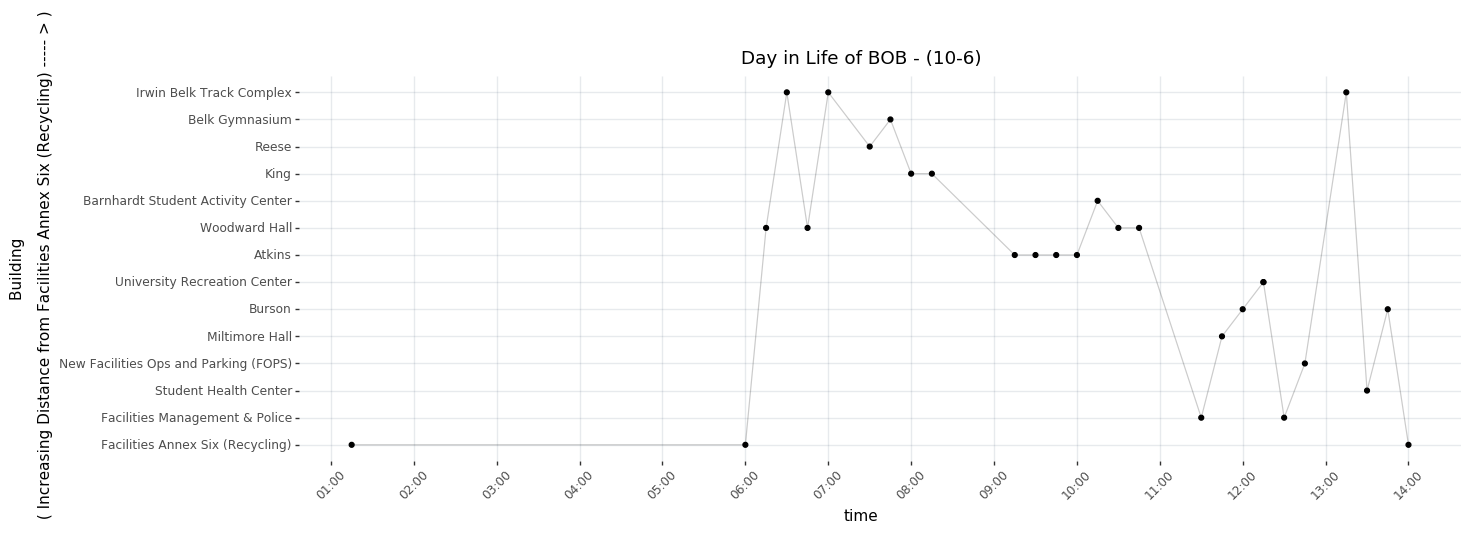

<ggplot: (-9223371926313762325)>


In [284]:
dayinlifeGeo(ldf , "00:12:cc:00:23:50" , day="10-6")

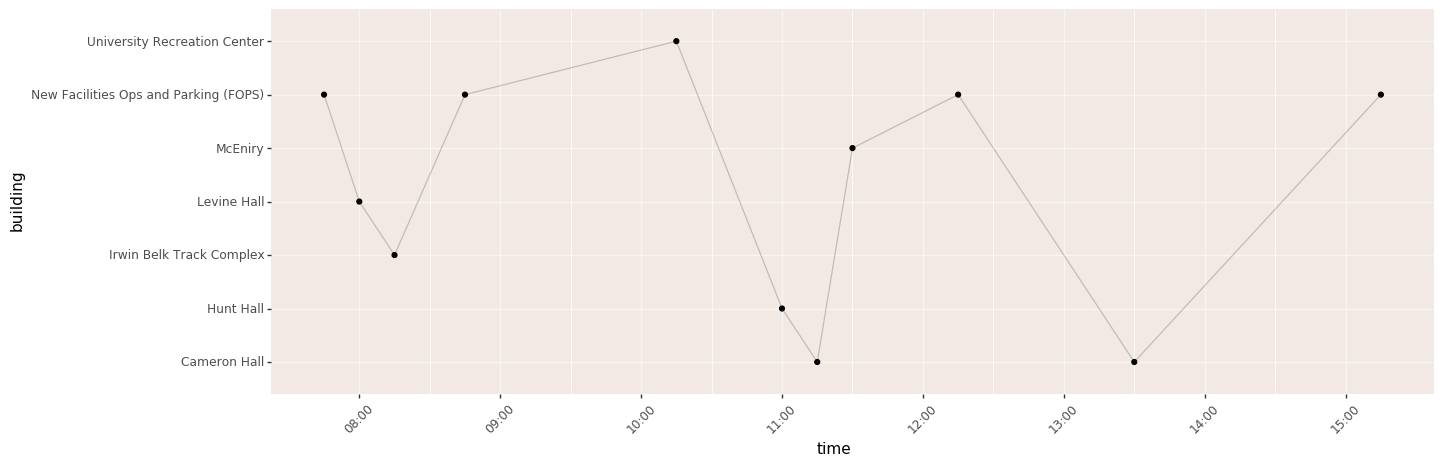

<ggplot: (-9223371875322050195)>


In [302]:
dayinlife(df , "c0:d3:c0:61:58:c3" , day="10-6")

In [329]:
import geocoder

In [338]:
geocoder.osm('EPIC ,University of North Carolina at charlotte')

<[ERROR - No results found] Osm - Geocode [empty]>

In [327]:
df["building"].unique()

array(['Storrs', 'Bioinformatics', 'EPIC', 'Center City Building',
       'Fretwell', 'Hunt Hall', 'Cameron Hall', 'Prospector',
       'Scott Hall', 'University Recreation Center', 'NRFC Fieldhouse',
       'Popp Martin Student Union',
       'New Facilities Ops and Parking (FOPS)', 'McMillan Greenhouse',
       'Burson', 'Denny', 'Kennedy', 'Friday', 'Cato Hall',
       'Gage Undergraduate Admissions Center', 'Housing & Residence Life',
       'Levine Hall', 'Facilities Annex Six (Recycling)',
       'Facilities Annex Seven (Grounds)', 'Irwin Belk Track Complex',
       'Facilities Management & Police', 'Belk Gymnasium', 'RUP 1',
       'King', 'Woodward Hall', 'College of Health and Human Services',
       'Atkins', 'Barnhardt Student Activity Center',
       'Student Health Center', 'Robinson Hall', 'Winningham', 'Macy',
       'Colvard', 'Smith', 'Auxiliary Services Building', 'RUP 4',
       'South Village Crossing', 'Memorial Hall', 'Belk Hall',
       'Witherspoon', 'Lynch Hall

In [ ]:
{
    "storrs" : "35.304495, -80.728968"
    ,"bioinformatics" : "35.312706, -80.741926"
    ,"epic" : "35.309017, -80.741558"
    ,"Center City Building" : "35.228381, -80.835039"
    ,"fretwell" : "35.306073, -80.729063"
    ,"hunt hall" :"35.301362, -80.736331"
    ,"Cameron hall":
    ,"scott hall" :"35.301649, -80.735275"
    ,"holshouser": "35.302139, -80.736078"
    ,"laurel hall" :"35.302682, -80.736163"
    ,"South Village Crossing" :"35.302932, -80.735058"
}